# UFC Fight Prediction
Brady Dickens (brd62) and Kyle Walsh (kew96)

## Exploration

### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

### Processing

In [0]:
data = pd.read_csv('data.csv')
prepro = pd.read_csv('preprocessed_data.csv')
fighters = pd.read_csv('raw_fighter_details.csv')
prepro['Winner_num'] = prepro.Winner.map({'Red':0,'Blue':1,'Draw':2})

In [0]:
countR = 0
countB = 0
for winner in prepro.Winner:
  if winner == "Red":
    countR += 1
  else:
    countB += 1
print(countR, countB)

2380 1212


In [0]:
doubleBlue = pd.DataFrame(data=prepro)
print(doubleBlue.shape)
for index, row in prepro.iterrows():
  if row["Winner"] == "Blue":
    doubleBlue = doubleBlue.append(row)
print(prepro.shape)
print(doubleBlue.shape)

(3592, 69)
(3592, 69)
(4804, 69)


In [0]:
for col in data.columns:
    print(col)
data.head()

In [0]:
for col in prepro.columns:
    print(col)
prepro.head()

In [0]:
weights = [col for col in prepro.columns if 'weight' in col]
just_weights = prepro.loc[:, weights]
just_weights.sum()

In [0]:
fighters.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


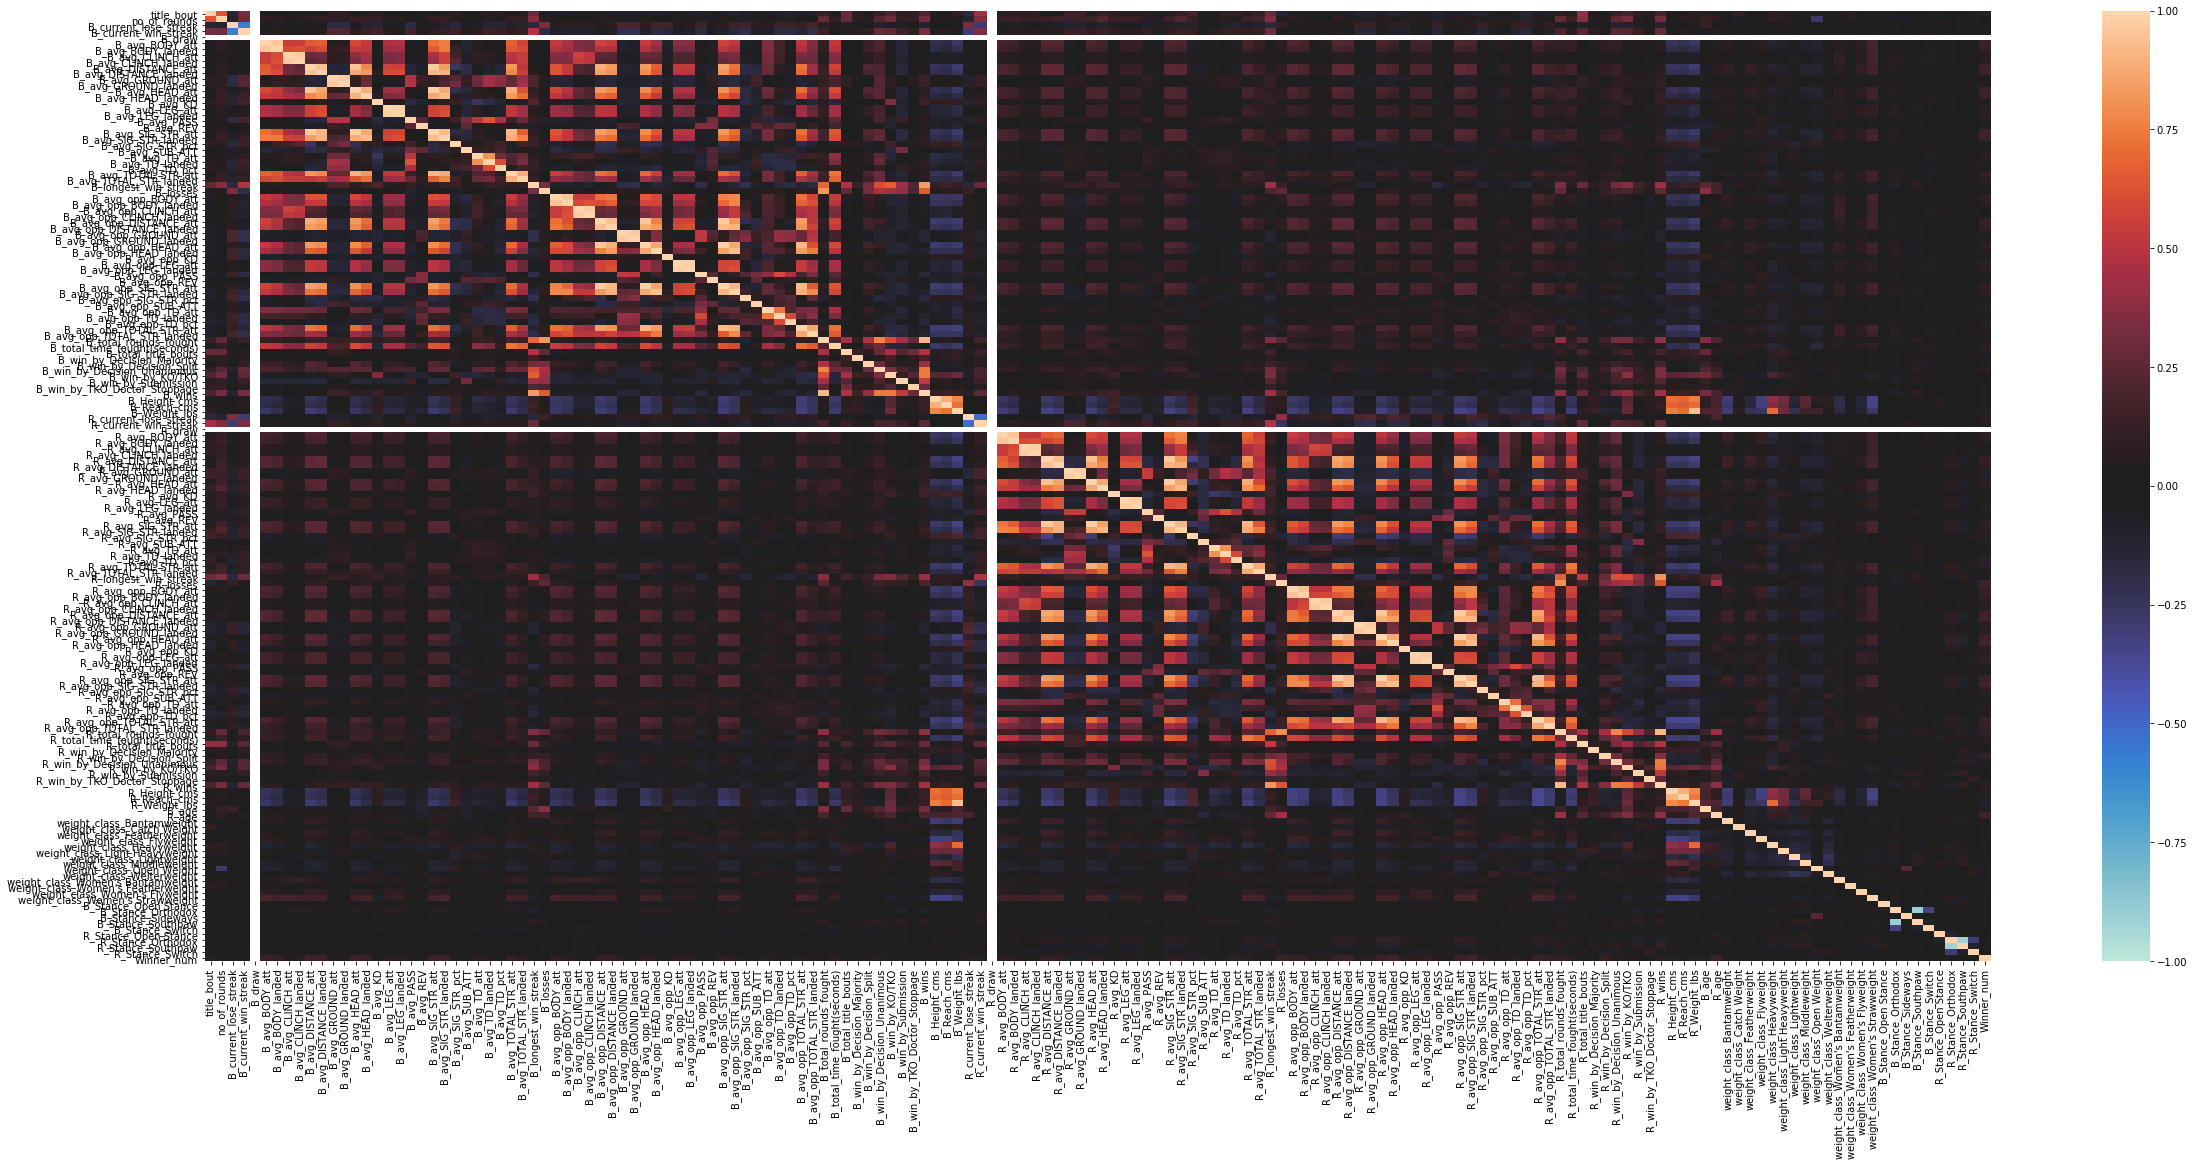

In [0]:
corr = prepro.corr()
fig, ax = plt.subplots(figsize=(40, 20))
plt.gcf().subplots_adjust(bottom=0.22)
p1 = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0,
            vmin=-1, ax=ax)

In [0]:
corr_abs = corr.abs()
sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)
#for i in corr.items():
  #for j in i:
    #print(j[0])
      #if k < 0.3:
       #corr.drop(j)
#print(corr)
#fig, ax = plt.subplots(figsize=(40, 20))
#plt.gcf().subplots_adjust(bottom=0.22)
#p1 = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, center=0, vmin=-1, ax=ax)

R_avg_opp_HEAD_att          R_avg_opp_SIG_STR_att               9.845529e-01
B_avg_opp_HEAD_att          B_avg_opp_SIG_STR_att               9.828780e-01
B_avg_HEAD_att              B_avg_SIG_STR_att                   9.796322e-01
B_avg_LEG_att               B_avg_LEG_landed                    9.792906e-01
R_avg_HEAD_att              R_avg_SIG_STR_att                   9.780309e-01
B_avg_opp_LEG_att           B_avg_opp_LEG_landed                9.775372e-01
R_avg_LEG_att               R_avg_LEG_landed                    9.760249e-01
R_avg_opp_LEG_att           R_avg_opp_LEG_landed                9.724436e-01
R_avg_opp_DISTANCE_att      R_avg_opp_SIG_STR_att               9.713277e-01
R_avg_CLINCH_att            R_avg_CLINCH_landed                 9.699194e-01
R_avg_GROUND_att            R_avg_GROUND_landed                 9.693394e-01
B_avg_CLINCH_att            B_avg_CLINCH_landed                 9.682783e-01
B_avg_opp_DISTANCE_att      B_avg_opp_SIG_STR_att               9.678138e-01

In [0]:
ws = [col for col in corr.columns if col[0].lower() == 'w']
#print(ws)
print(corr.loc["Winner_num"].sort_values(ascending = False)[:10])

Winner_num                   1.000000
R_avg_opp_SIG_STR_landed     0.170852
R_avg_opp_HEAD_landed        0.165848
R_age                        0.159314
R_avg_opp_DISTANCE_landed    0.157833
B_avg_SIG_STR_att            0.156798
R_losses                     0.155606
B_avg_DISTANCE_att           0.154247
B_avg_SIG_STR_landed         0.151789
B_avg_DISTANCE_landed        0.150601
Name: Winner_num, dtype: float64


In [0]:
newPrepro = pd.DataFrame(data=prepro)
dropping = []
for columns in prepro.columns:
  if columns not in corr.loc["Winner_num"].sort_values(ascending = False)[:25]:
    dropping.append(columns)
newPrepro.drop(dropping, axis=1, inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text xticklabel objects>)

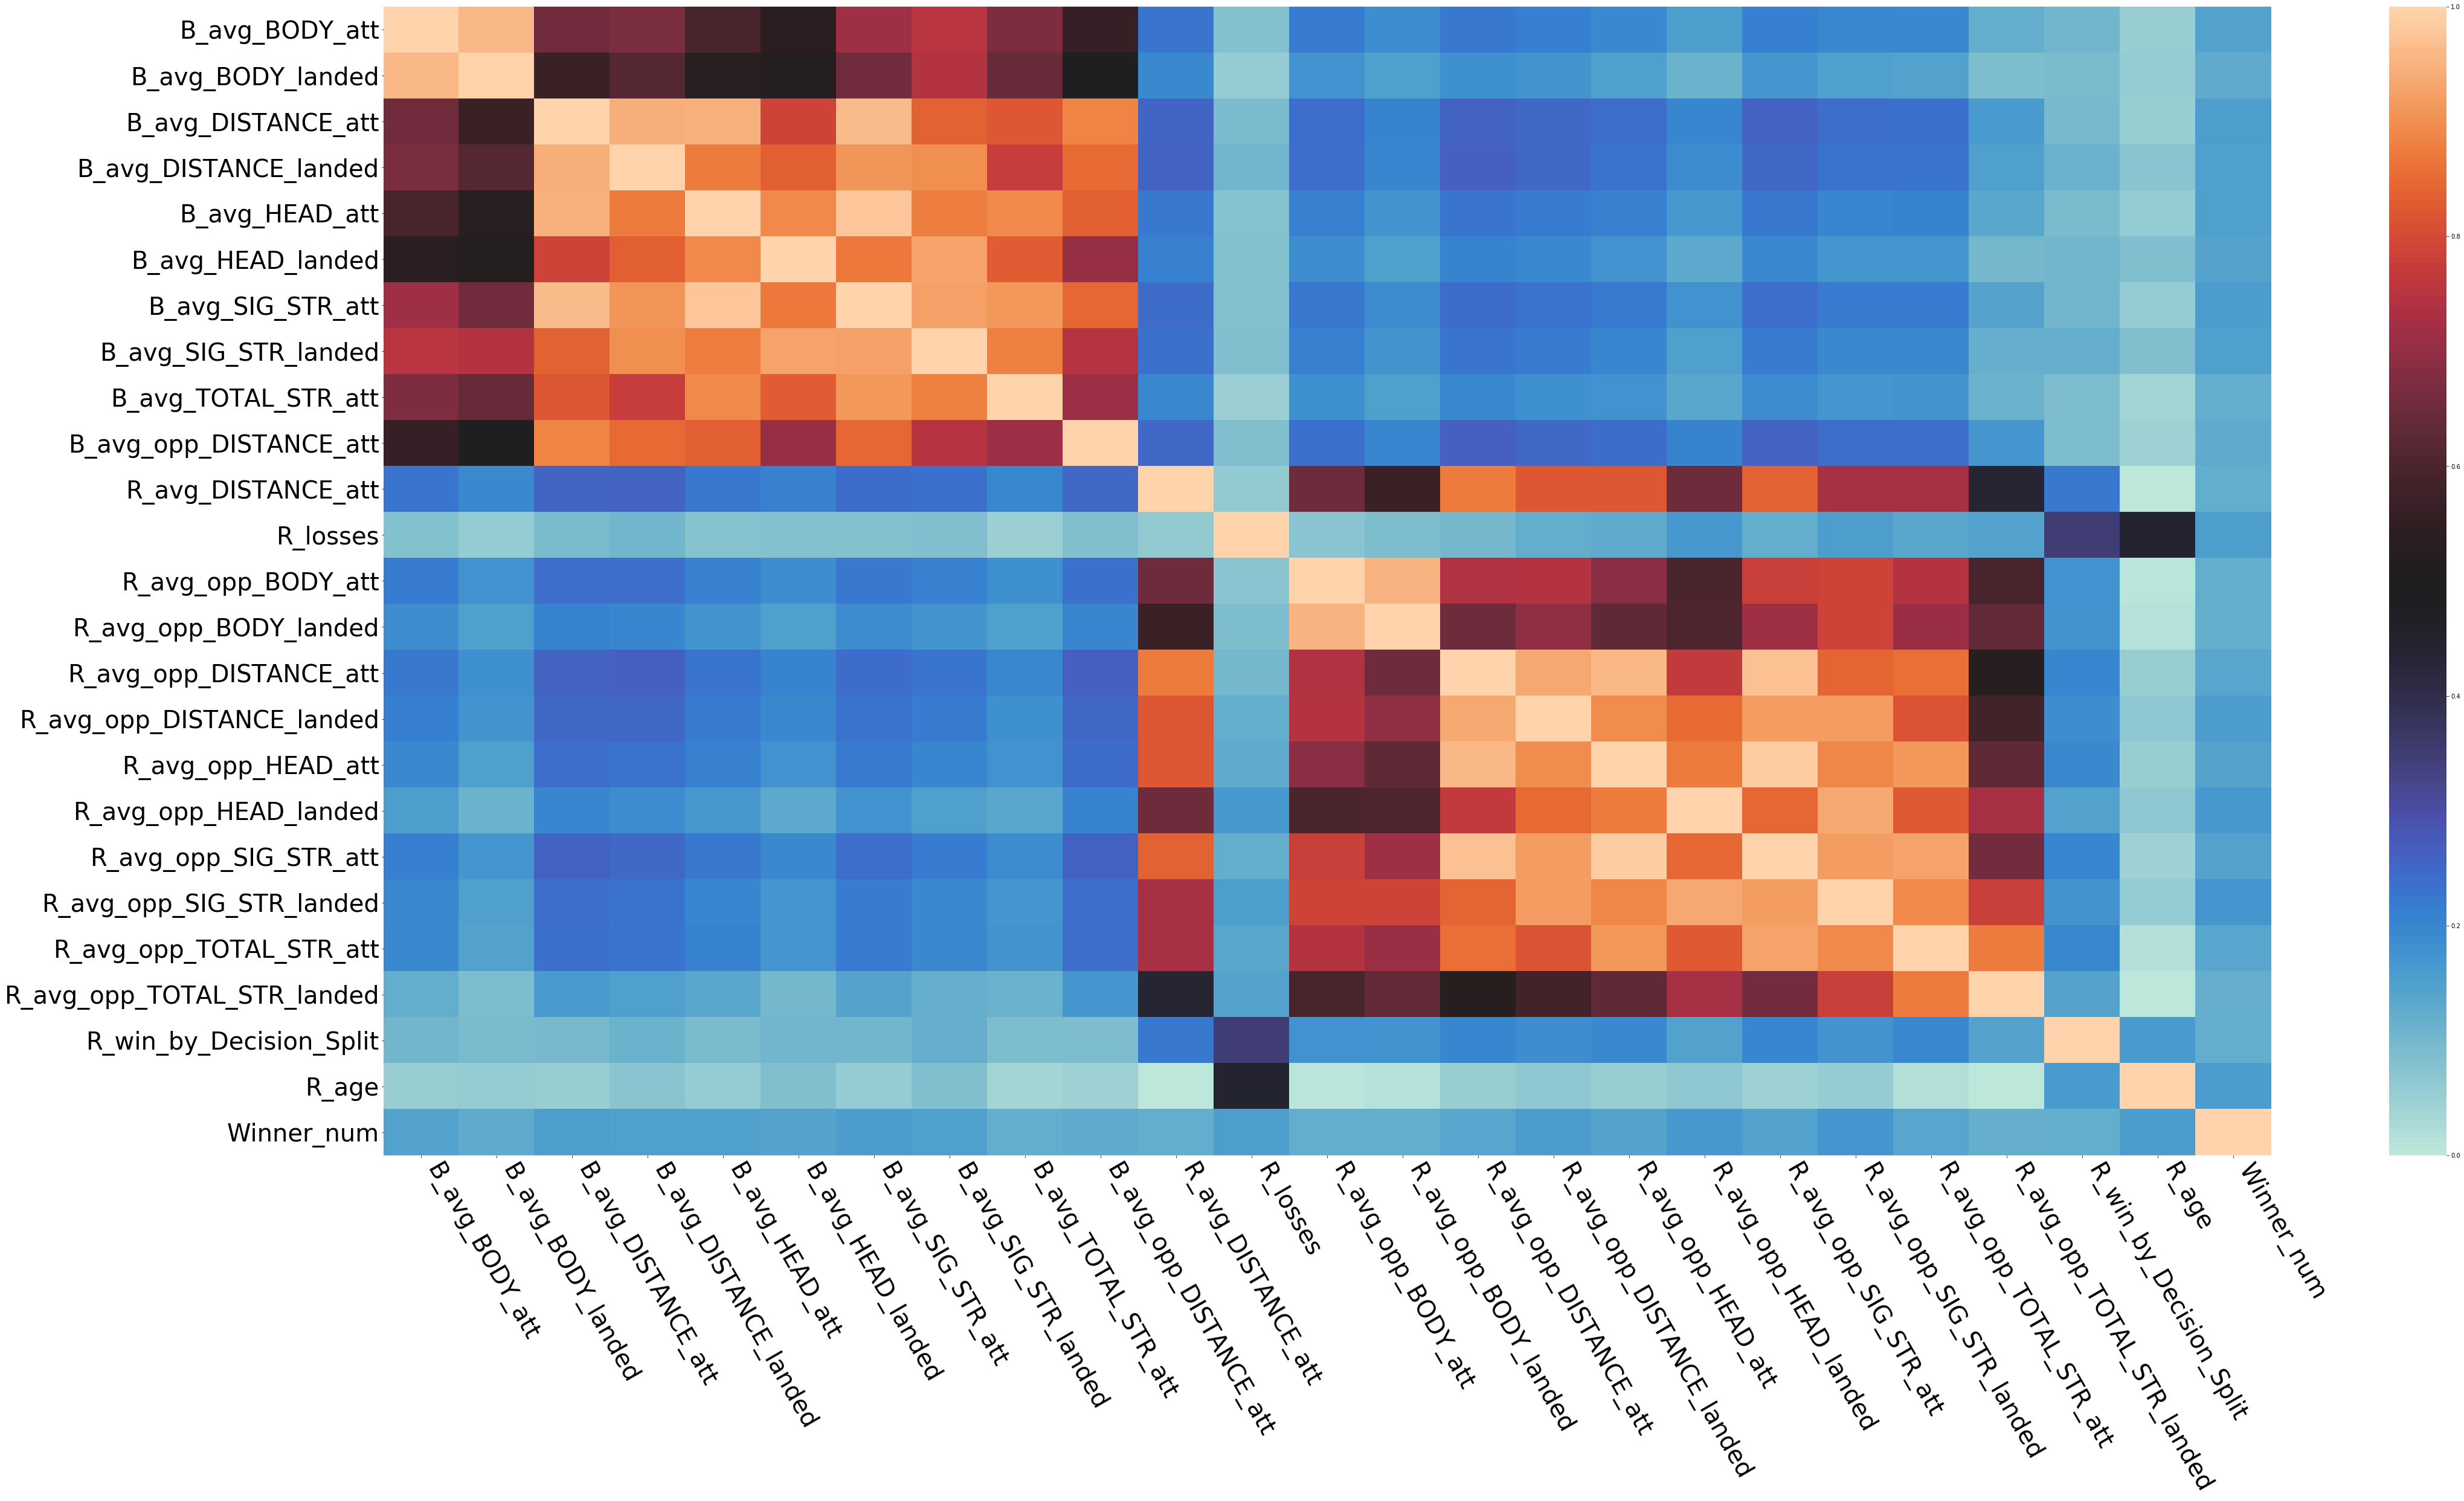

In [0]:
newCorr = newPrepro.corr()
fig, ax = plt.subplots(figsize=(70, 40))
plt.gcf().subplots_adjust(bottom=0.22)
ax.tick_params(labelsize=40)
p1 = sns.heatmap(newCorr, xticklabels=newCorr.columns.values, yticklabels=newCorr.columns.values, center=0.5,
            vmin=0, ax=ax)
plt.xticks(rotation=300, ha='left')

(68, 68)


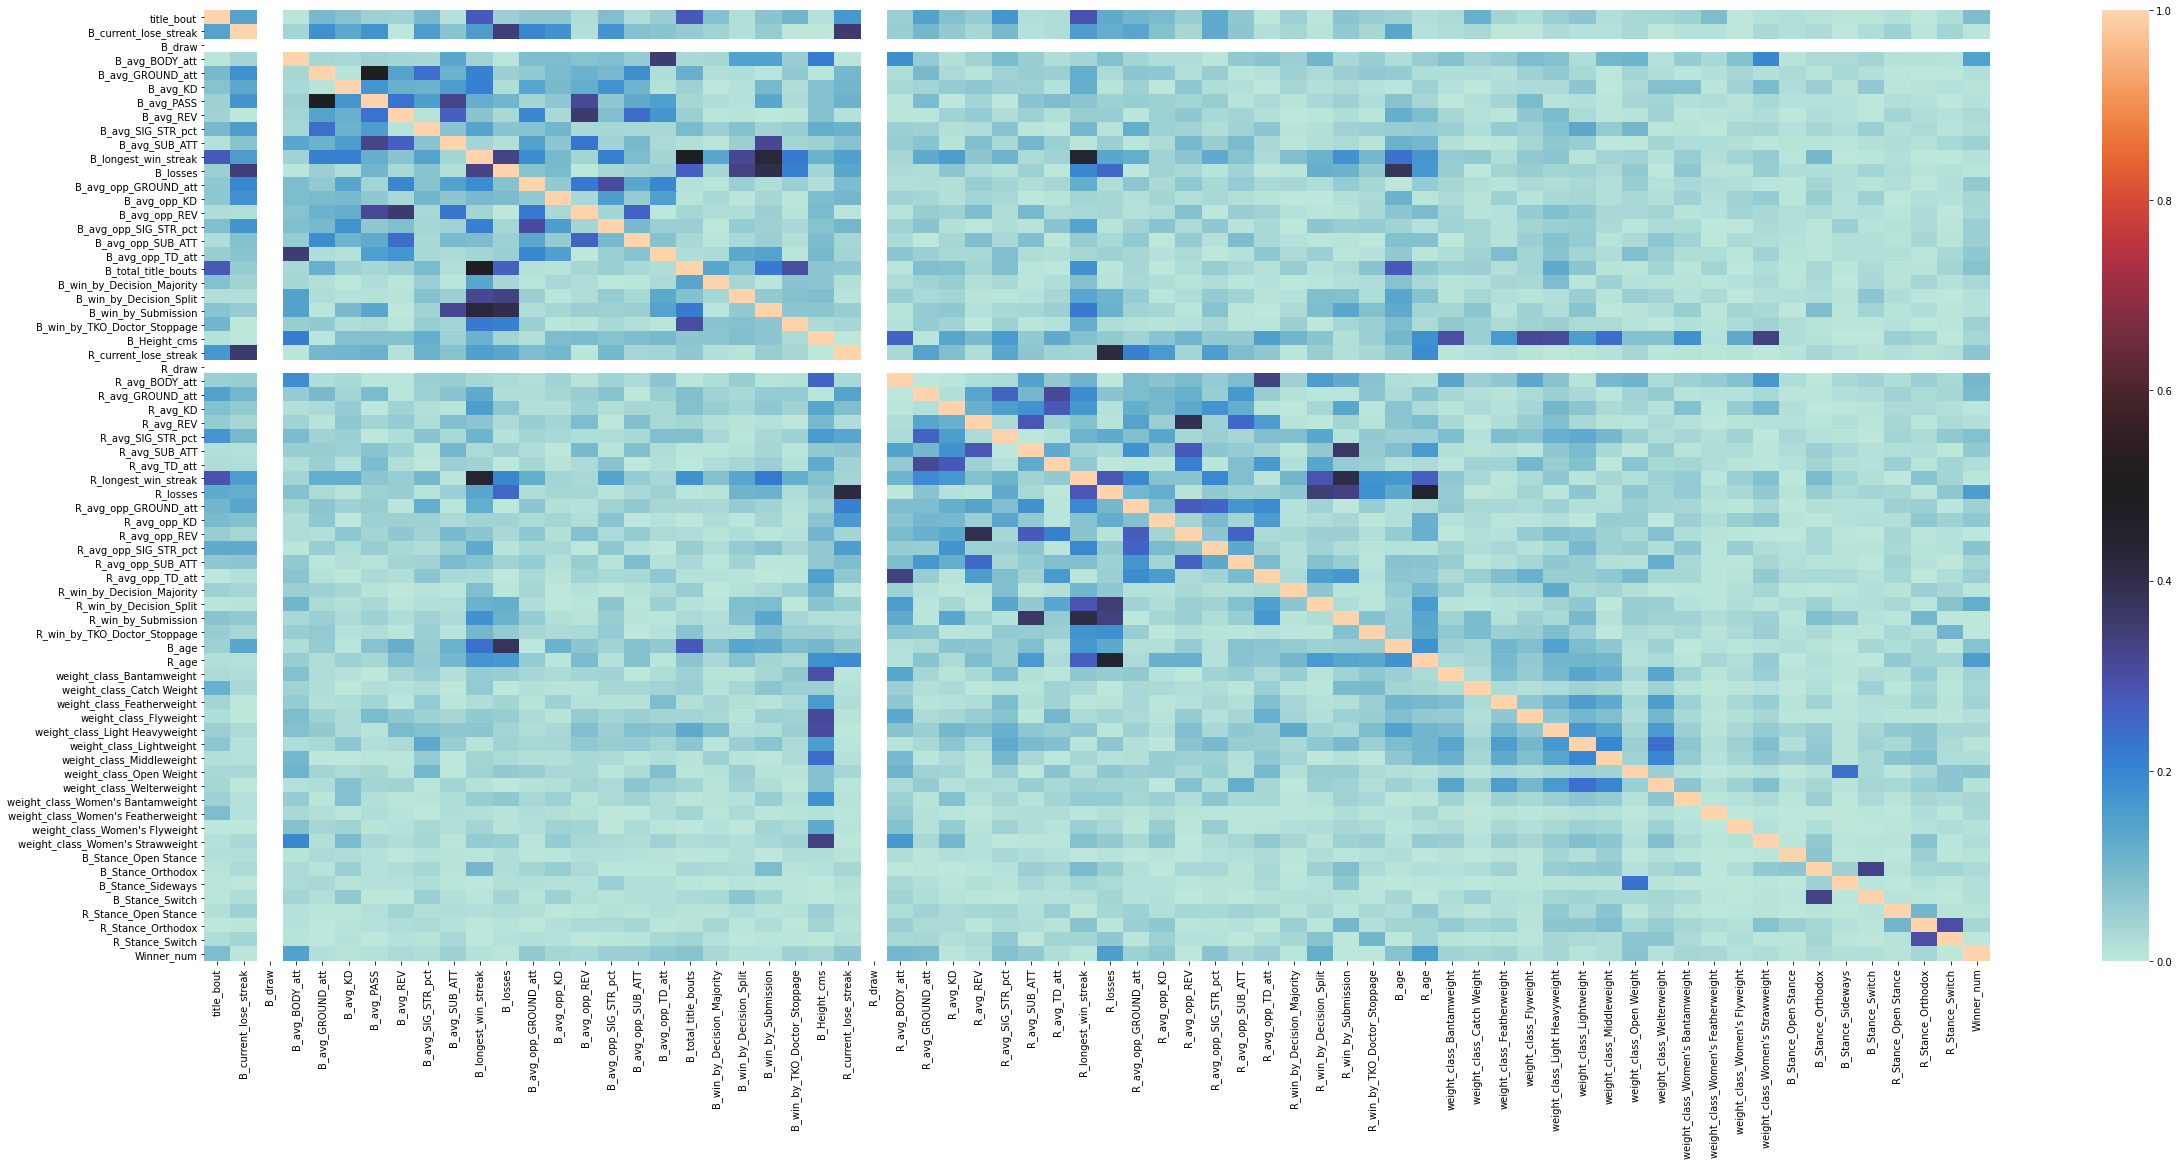

In [0]:
# Create correlation matrix
corr_matrix = prepro.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
pp = prepro
pp.drop(to_drop, axis=1, inplace=True)
ppcorr = pp.corr().abs()
print(ppcorr.shape)

fig, ax = plt.subplots(figsize=(40, 20))
plt.gcf().subplots_adjust(bottom=0.22)
p1 = sns.heatmap(ppcorr, xticklabels=ppcorr.columns.values, yticklabels=ppcorr.columns.values, center=0.5,
            vmin=0, ax=ax)

# Models - No Interaction

Train/Test Split

In [0]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split(prepro, train_size=0.7, random_state=1)
train_X, test_X, train_y, test_y = train_test_split(prepro, prepro.loc[:, 'Winner_num'], test_size=0.2, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
train_X = train_X.drop(['Winner', 'Winner_num'], axis=1)
val_X = val_X.drop(['Winner', 'Winner_num'], axis=1)
#train_y = train.loc[:, 'Winner_num']
test_X = test_X.drop(['Winner', 'Winner_num'], axis=1)
#test_y = test.loc[:, 'Winner_num']

In [0]:
len(test_X.columns)

159

## Basic Logistic Model - No Regularization

### Imports

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from xgboost import XGBClassifier

### Model

In [0]:
lr = LogisticRegression(penalty='none', dual=False, tol=0.0001,
                   C=1.0, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='saga',
                   max_iter=10000, multi_class='auto', verbose=0,
                   warm_start=False, n_jobs=-1, l1_ratio=None)
fit_lr = lr.fit(train_X, train_y)

### Evaluation

In [0]:
fit_lr.score(val_X, val_y)

0.6926286509040334

## Basic Logistic Model - with Regularization

### Lasso/L1 Regularization

In [0]:
lr_l1 = LogisticRegressionCV(penalty='l1', dual=False, tol=0.0001,
                   Cs=10, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='liblinear',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10)
fit_lr_l1 = lr_l1.fit(train_X, train_y)

#### Evaluation

In [0]:
fit_lr_l1.score(test_X, test_y)

0.6428571428571429

In [0]:
fit_lr_l1.coef_

### Ridge/L2 Regularization

In [0]:
lr_l2 = LogisticRegressionCV(penalty='l2', dual=False, tol=0.0001,
                   Cs=10, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='liblinear',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10)
fit_lr_l2 = lr_l2.fit(train_X, train_y)

#### Evaluation

In [0]:
fit_lr_l2.score(test_X, test_y)

0.6400832177531207

In [0]:
fit_lr_l2.coef_

array([[-1.07151577e-02, -2.41661918e-03, -2.23245755e-04,
         2.74758783e-02,  0.00000000e+00,  8.49206903e-03,
         9.97773414e-03, -6.07429026e-03,  8.50741851e-03,
         7.70976569e-03, -5.69817061e-03,  3.00062114e-03,
         9.70872187e-03, -1.22479269e-02,  1.77390611e-02,
        -1.17758974e-03,  8.39195447e-03, -1.51988255e-02,
         1.72557102e-02,  1.78055762e-03,  4.63609658e-03,
         1.25179698e-02, -1.90893092e-03, -5.15631215e-04,
         4.33812601e-02,  1.33153968e-02, -7.33624860e-03,
         4.17075388e-03, -1.67813338e-02, -4.72127266e-03,
         5.24451781e-03,  6.42900387e-03, -2.02386287e-02,
        -1.14160218e-02,  1.22269482e-02,  5.09175372e-03,
        -3.73434043e-03, -1.22876454e-03,  1.63308128e-03,
        -1.50333978e-02,  1.88820435e-02,  1.24810008e-04,
         1.05136131e-03,  1.14822743e-02,  9.80660918e-03,
         4.82460030e-03, -7.55303257e-03,  1.01256891e-02,
        -2.18911319e-03, -1.28423343e-02,  2.10176321e-0

### Elastic Net

In [0]:
ratios = list(np.linspace(0,1,10))
lr_elas = LogisticRegressionCV(penalty='elasticnet', dual=False, tol=0.0001,
                   Cs=10, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='saga',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10, l1_ratios=ratios)
fit_lr_elas = lr_elas.fit(train_X, train_y)

#### Evaluation

In [0]:
fit_lr_elas.score(test_X, test_y)

0.6716141001855288

## KNN

#### Imports

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#### Model

In [0]:
accuracies_knn = []
for k in np.linspace(1, 100, 100):
    knn = KNeighborsClassifier(n_neighbors=int(k), weights='uniform', algorithm='auto',
                               leaf_size=30, p=2, n_jobs=-1)
    fit_knn = knn.fit(train_X, train_y)
    accuracies_knn.append(fit_knn.score(val_X, val_y))

#### Evaluation

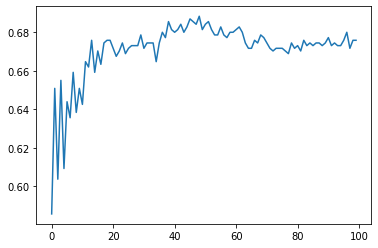

In [0]:
plt.plot(accuracies_knn)

In [0]:
print(accuracies_knn.index(max(accuracies_knn)))
max(accuracies_knn)

48


0.6884561891515995

## Splines

## Tree Based Models

### Basic Tree

#### Imports

In [0]:
from sklearn.tree import DecisionTreeClassifier

#### Model

In [0]:
accuracies_basic_tree = []
for f in np.linspace(0, 1, 100)[1:]:
    tree = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=10,
                                  max_features=f)
    fit_tree = tree.fit(train_X, train_y)
    accuracies_basic_tree.append(fit_tree.score(val_X, val_y))

#### Evaluation

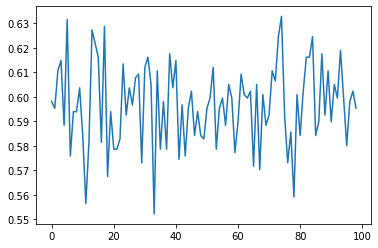

In [0]:
plt.plot(accuracies_basic_tree)

In [0]:
print(accuracies_basic_tree.index(max(accuracies_basic_tree)))
max(accuracies_basic_tree)

74


0.6328233657858137

### Bagging

### Random Forest

### Boosting

# Models - Interaction

Train/Test Split

In [0]:
RminusB = ['_avg_BODY_att', 'avg_BODY_landed', '_avg_CLINCH_att', '_avg_CLINCH_landed', '_avg_DISTANCE_att', '_avg_DISTANCE_landed', '_avg_GROUND_att', '_avg_GROUND_landed', '_avg_HEAD_att', '_avg_HEAD_landed',
         '_avg_KD', '_avg_LEG_att', '_avg_LEG_landed', '_avg_PASS', '_avg_REV', '_avg_SIG_STR_att', '_avg_SIG_STR_landed', '_avg_SIG_STR_pct', '_avg_SUB_ATT', '_avg_TD_att', '_avg_TD_landed', '_avg_TD_pct',
         '_avg_TOTAL_STR_att', '_avg_TOTAL_STR_landed', '_avg_opp_BODY_att', '_avg_opp_BODY_landed', '_avg_opp_CLINCH_att', '_avg_opp_CLINCH_landed', '_avg_opp_DISTANCE_att', '_avg_opp_DISTANCE_landed',
         '_avg_opp_GROUND_att', '_avg_opp_GROUND_landed', '_avg_opp_HEAD_att', '_avg_opp_HEAD_landed', '_avg_opp_KD', '_avg_opp_LEG_att', '_avg_opp_LEG_landed', '_avg_opp_PASS', '_avg_opp_REV',
         '_avg_opp_SIG_STR_att', '_avg_opp_SIG_STR_landed', '_avg_opp_SIG_STR_pct', '_avg_opp_SUB_ATT', '_avg_opp_TD_att', '_avg_opp_TD_landed', '_avg_opp_TD_pct', '_avg_opp_TOTAL_STR_att',
         '_avg_opp_TOTAL_STR_landed']
RminusBframe = pd.DataFrame()
colsNotToCopy = set()
for term in RminusB:
  Rterm = "R" + term
  Bterm = "B" + term
  colsNotToCopy.add(Rterm)
  colsNotToCopy.add(Bterm)
  diffTerm = "Diff" + term
  if Rterm in prepro.columns and Bterm in prepro.columns:
    diffCol = (prepro[Rterm] +1) / (prepro[Bterm] +2)
    RminusBframe[diffTerm] = diffCol
for cols in prepro.columns:
  if cols not in colsNotToCopy:
    RminusBframe[cols] = prepro[cols]
# print(RminusBframe)

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(prepro, train_size=0.7, random_state=1)
train_X, test_X, train_y, test_y = train_test_split(RminusBframe, RminusBframe.loc[:, 'Winner_num'], test_size=0.2, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
train_X = train_X.drop(['Winner', 'Winner_num'], axis=1)
val_X = val_X.drop(['Winner', 'Winner_num'], axis=1)
#train_y = train.loc[:, 'Winner_num']
test_X = test_X.drop(['Winner', 'Winner_num'], axis=1)
#test_y = test.loc[:, 'Winner_num']

In [0]:
len(test_X.columns)

112

## Basic Logistic Model - No Regularization

### Imports

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from xgboost import XGBClassifier

### Model

In [0]:
lr = LogisticRegression(penalty='none', dual=False, tol=0.0001,
                   C=1.0, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='saga',
                   max_iter=10000, multi_class='auto', verbose=0,
                   warm_start=False, n_jobs=-1, l1_ratio=None)
fit_lr = lr.fit(train_X, train_y)

### Evaluation

In [0]:
fit_lr.score(val_X, val_y)

0.6731571627260083

## Basic Logistic Model - with Regularization

### Lasso/L1 Regularization

In [0]:
lr_l1 = LogisticRegressionCV(penalty='l1', dual=False, tol=0.0001,
                   Cs=[x/10 for x in range(1, 10)], fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='liblinear',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10)
fit_lr_l1 = lr_l1.fit(train_X, train_y)

#### Evaluation

In [0]:
for i, l in enumerate(fit_lr_l1.scores_[1]):
    print((i+1)/10, np.mean(l))

0.1 0.6481481481481481
0.2 0.6651234567901235
0.3 0.6296296296296297
0.4 0.7386831275720165
0.5 0.6589147286821705
0.6 0.6521963824289405
0.7 0.7198966408268733
0.8 0.6816537467700258
0.9 0.6811369509043926
1.0 0.6692506459948321


### Ridge/L2 Regularization

In [0]:
lr_l2 = LogisticRegressionCV(penalty='l2', dual=False, tol=0.0001,
                   Cs=[x/10 for x in range(1, 10)], fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='liblinear',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10)
fit_lr_l2 = lr_l2.fit(train_X, train_y)

#### Evaluation

In [0]:
for i, l in enumerate(fit_lr_l2.scores_[1]):
    print((i+1)/10, np.mean(l))

0.1 0.6538065843621399
0.2 0.669238683127572
0.3 0.6188271604938271
0.4 0.7335390946502058
0.5 0.6366925064599482
0.6 0.6635658914728682
0.7 0.7224806201550388
0.8 0.6775193798449612
0.9 0.6847545219638244
1.0 0.6599483204134367


### Elastic Net

In [0]:
ratios = list(np.linspace(0,1,10))
lr_elas = LogisticRegressionCV(penalty='elasticnet', dual=False, tol=0.0001,
                   Cs=[x/10 for x in range(1, 10)], fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='saga',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1, cv=10, l1_ratios=ratios)
fit_lr_elas = lr_elas.fit(train_X, train_y)

#### Evaluation

In [0]:
for i, l in enumerate(fit_lr_elas.scores_[1]):
    for i2, l2 in enumerate(l):
        print('c:', (i+1)/10, 'r:', ratios[i2], 'score:', np.mean(l2))

c: 0.1 r: 0.0 score: 0.6523148148148148
c: 0.1 r: 0.1111111111111111 score: 0.6532407407407408
c: 0.1 r: 0.2222222222222222 score: 0.6537037037037037
c: 0.1 r: 0.3333333333333333 score: 0.6546296296296296
c: 0.1 r: 0.4444444444444444 score: 0.6550925925925926
c: 0.1 r: 0.5555555555555556 score: 0.6564814814814814
c: 0.1 r: 0.6666666666666666 score: 0.6564814814814814
c: 0.1 r: 0.7777777777777777 score: 0.6564814814814814
c: 0.1 r: 0.8888888888888888 score: 0.6574074074074074
c: 0.2 r: 0.0 score: 0.6518518518518518
c: 0.2 r: 0.1111111111111111 score: 0.6481481481481481
c: 0.2 r: 0.2222222222222222 score: 0.6476851851851851
c: 0.2 r: 0.3333333333333333 score: 0.6472222222222221
c: 0.2 r: 0.4444444444444444 score: 0.6472222222222221
c: 0.2 r: 0.5555555555555556 score: 0.6476851851851851
c: 0.2 r: 0.6666666666666666 score: 0.6476851851851851
c: 0.2 r: 0.7777777777777777 score: 0.6476851851851851
c: 0.2 r: 0.8888888888888888 score: 0.6476851851851851
c: 0.3 r: 0.0 score: 0.6425925925925926


## KNN

#### Imports

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### Model

In [0]:
accuracies_knn = []
for k in np.linspace(1, 100, 100):
    knn = KNeighborsClassifier(n_neighbors=int(k), weights='uniform', algorithm='auto',
                               leaf_size=30, p=2, n_jobs=-1)
    cv_scores = cross_val_score(knn, train_X, train_y, cv=10)
    accuracies_knn.append(np.mean(cv_scores))

#### Evaluation

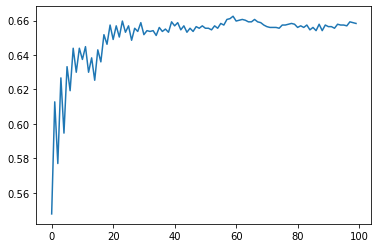

In [0]:
plt.plot(accuracies_knn)

In [0]:
print(accuracies_knn.index(max(accuracies_knn)))
max(accuracies_knn)

59


0.6624892334194661

## Tree Based Models

### Basic Tree

#### Imports

In [0]:
from sklearn.tree import DecisionTreeClassifier

#### Model

In [0]:
accuracies_basic_tree = []
for f in np.linspace(0, 1, 100)[1:]:
    tree = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=10,
                                  max_features=f)
    cv_scores = cross_val_score(tree, train_X, train_y, cv=10)
    accuracies_basic_tree.append(np.mean(cv_scores))

#### Evaluation

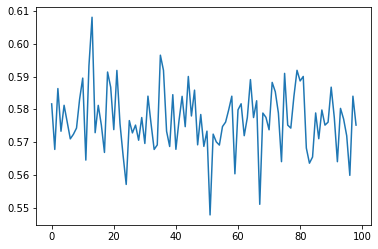

In [0]:
plt.plot(accuracies_basic_tree)

In [0]:
print(accuracies_basic_tree.index(max(accuracies_basic_tree)))
max(accuracies_basic_tree)

13


0.6081395348837209

### Bagging

#### Imports

In [0]:
from sklearn.ensemble import BaggingClassifier

#### Model

In [0]:
vals = np.linspace(1, 20, 20)
scores = list()
for v in vals:
    fit_ensemble_bagging = BaggingClassifier(base_estimator=None, n_estimators=int(v), max_samples=0.8, max_features=0.8, bootstrap=True,
                                             bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1)
    scores.append(np.mean(cross_val_score(fit_ensemble_bagging, train_X, train_y, cv=10)))

#### Evaluation

In [0]:
print(vals[scores.index(max(scores))])
max(scores)

14.0


0.6550516795865633

### Random Forest

#### Imports

In [0]:
from sklearn.ensemble import RandomForestClassifier

#### Model

In [0]:
estimators = list(np.linspace(50, 200, 10))
crits = ['gini', 'entropy']
min_samples_split = list(np.linspace(2, 6, 5))
alpha = list(np.linspace(0, 1, 5))
arrays = [crits, min_samples_split, alpha, estimators]
mult_ind = pd.MultiIndex.from_product(arrays, names=['criterion', 'min_split', 'pruning', 'estimators'])
rf_df = pd.DataFrame(index=mult_ind, columns=['score']).reset_index()
for _, row in rf_df.iterrows():
    if row.name % 50 == 0:
        print(row.name)
    fit_ensemble_rf = RandomForestClassifier(n_estimators=int(row.estimators), criterion=row.criterion, min_samples_split=int(row.min_split), min_samples_leaf=1, max_features='sqrt',
                                             n_jobs=-1, ccp_alpha=int(row.pruning))
    rf_df.loc[row.name, 'score'] = np.mean(cross_val_score(fit_ensemble_rf, train_X, train_y, cv=10))

0
50
100
150
200
250
300
350
400
450


#### Evaluation

In [0]:
best = np.max(rf_df.score)
rf_df[rf_df.score == best]

,criterion,min_split,pruning,estimators,score
406,entropy,5.0,0.0,150.0,0.67363


### Boosting

#### Imports

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier, cv
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#### Setup

In [0]:
xgb_train = xgb.DMatrix(train_X, label=train_y)
xgb_test = xgb.DMatrix(test_X, test_y)

new_train = train.drop('Winner', axis=1)
new_test = test.drop('Winner', axis=1)

predictors = [x for x in new_train.columns if (x != 'Winner' and x != 'Winner_num')]

def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Winner_num'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Winner_num'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Winner_num'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Winner_num'], dtrain_predprob))
                    
    xgb.plot_importance(alg)

#### Model


Model Report
Accuracy : 1
AUC Score (Train): 1.000000


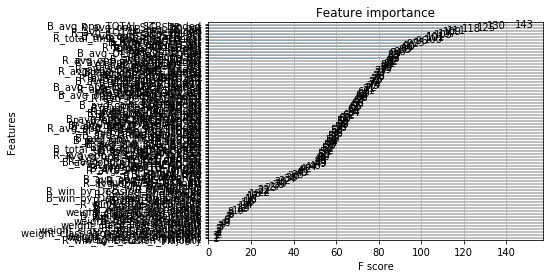

In [0]:
xgb1 = XGBClassifier(learning_rate=0.05,
                     n_estimators=10000,
                     max_depth=10,
                     min_child_weight=2,
                     gamma=0.2,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=-1,
                     scale_pos_weight=1,
                     seed=1)
modelfit(xgb1, new_train, predictors)

In [0]:
param_test1a = {'max_depth': range(5, 9, 2),
               'min_child_weight': range(1, 5, 2)
               }
gsearch1a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,
                                                n_estimators=10000,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test1a,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch1a.fit(new_train[predictors], new_train.Winner_num)
gsearch1a.cv_results_
print(gsearch1a.best_estimator_)
print(gsearch1a.best_score_)
print(gsearch1a.best_params_)
print(gsearch1a.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6603253652058434
{'max_depth': 7, 'min_child_weight': 3}
3


In [0]:
param_test1b = {'max_depth': [6, 7, 8],
               'min_child_weight': [2, 3, 4]
               }
gsearch1b = GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,
                                                n_estimators=10000,
                                                max_depth=5,
                                                min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test1b,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch1b.fit(new_train[predictors], new_train.Winner_num)
gsearch1b.cv_results_
print(gsearch1b.best_estimator_)
print(gsearch1b.best_score_)
print(gsearch1b.best_params_)
print(gsearch1b.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6639062796433315
{'max_depth': 6, 'min_child_weight': 3}
1


In [0]:
param_test1c = {'max_depth': [5, 6]
               }
gsearch1c = GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,
                                                n_estimators=10000,
                                                max_depth=5,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test1c,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch1c.fit(new_train[predictors], new_train.Winner_num)
print(gsearch1c.cv_results_)
print(gsearch1c.best_estimator_)
print(gsearch1c.best_score_)
print(gsearch1c.best_params_)
print(gsearch1c.best_index_)

{'mean_fit_time': array([211.70744729, 179.2282383 ]), 'std_fit_time': array([ 2.5612334 , 43.68812217]), 'mean_score_time': array([0.08092453, 0.06557329]), 'std_score_time': array([0.00768041, 0.01154671]), 'param_max_depth': masked_array(data=[5, 6],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 5}, {'max_depth': 6}], 'split0_test_score': array([0.57936508, 0.57936508]), 'split1_test_score': array([0.67460317, 0.69047619]), 'split2_test_score': array([0.64285714, 0.67460317]), 'split3_test_score': array([0.66269841, 0.65079365]), 'split4_test_score': array([0.66135458, 0.66932271]), 'split5_test_score': array([0.65338645, 0.64541833]), 'split6_test_score': array([0.70119522, 0.68924303]), 'split7_test_score': array([0.64940239, 0.65338645]), 'split8_test_score': array([0.68924303, 0.69322709]), 'split9_test_score': array([0.6812749 , 0.69322709]), 'mean_test_score': array([0.65953804, 0.66390628]), 'std_test_score': arra

In [0]:
param_test2a = {'gamma': [i/10 for i in range(10)]
               }
gsearch2a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=1000,
                                                max_depth=6,
                                                min_child_weight=3,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test2a,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch2a.fit(new_train[predictors], new_train.Winner_num)
print(gsearch2a.best_estimator_)
print(gsearch2a.best_score_)
print(gsearch2a.best_params_)
print(gsearch2a.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6666761525327264
{'gamma': 0.8}
8



Model Report
Accuracy : 0.8178
AUC Score (Train): 0.925182


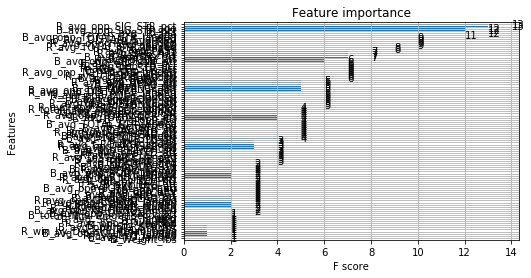

In [0]:
xgb2 = XGBClassifier(learning_rate=0.1,
                     n_estimators=1000,
                     max_depth=6,
                     min_child_weight=3,
                     gamma=0.8,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     nthread=-1,
                     scale_pos_weight=1,
                     seed=1)
modelfit(xgb2, new_train, predictors)

In [0]:
param_test3a = {'subsample': [i/10 for i in range(6, 10)],
                'colsample_bytree': [i/10 for i in range(6, 10)]
               }
gsearch3a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.05,
                                                n_estimators=10000,
                                                max_depth=6,
                                                min_child_weight=3,
                                                gamma=0.8,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test3a,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch3a.fit(new_train[predictors], new_train.Winner_num)
print(gsearch3a.best_estimator_)
print(gsearch3a.best_score_)
print(gsearch3a.best_params_)
print(gsearch3a.best_index_)

In [0]:
param_test3b = {'subsample': [i/10 for i in range(5, 7)],
                'colsample_bytree': [i/10 for i in range(6, 8)]
               }
gsearch3b = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=1000,
                                                max_depth=8,
                                                min_child_weight=4,
                                                gamma=0.1,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test3b,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch3b.fit(new_train[predictors], new_train.Winner_num)
print(gsearch3b.best_estimator_)
print(gsearch3b.best_score_)
print(gsearch3b.best_params_)
print(gsearch3b.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6646793777271867
{'colsample_bytree': 0.7, 'subsample': 0.6}
3


In [0]:
param_test3c = {'subsample': [i/100 for i in range(55, 65, 5)],
                'colsample_bytree': [i/100 for i in range(65, 75, 5)]
               }
gsearch3c = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=1000,
                                                max_depth=8,
                                                min_child_weight=4,
                                                gamma=0.1,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test3c,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch3c.fit(new_train[predictors], new_train.Winner_num)
print(gsearch3c.best_estimator_)
print(gsearch3c.best_score_)
print(gsearch3c.best_params_)
print(gsearch3c.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6646793777271867
{'colsample_bytree': 0.7, 'subsample': 0.6}
3


In [0]:
param_test4a = {'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
                'reg_lambda': [0, 0.01, 0.1, 1, 100]
               }
gsearch4a = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=1000,
                                                max_depth=8,
                                                min_child_weight=4,
                                                gamma=0.1,
                                                subsample=0.6,
                                                colsample_bytree=0.7,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test4a,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch4a.fit(new_train[predictors], new_train.Winner_num)
print(gsearch4a.best_estimator_)
print(gsearch4a.best_score_)
print(gsearch4a.best_params_)
print(gsearch4a.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6, tree_method=None,
              validate_parameters=False, verbosity=None)
0.6714364763169545
{'reg_alpha': 0.01, 'reg_lambda': 1}
8


In [0]:
param_test4b = {'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
                'reg_lambda': [x/10 for x in range(5, 100, 5)]
               }
gsearch4b = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,
                                                n_estimators=1000,
                                                max_depth=8,
                                                min_child_weight=4,
                                                gamma=0.1,
                                                subsample=0.6,
                                                colsample_bytree=0.7,
                                                objective='binary:logistic',
                                                nthread=-1,
                                                scale_pos_weight=1),
                        param_grid=param_test4b,
                        scoring=metrics.make_scorer(accuracy_score),
                        n_jobs=-1,
                        cv=10
)
gsearch4b.fit(new_train[predictors], new_train.Winner_num)
print(gsearch4b.best_estimator_)
print(gsearch4b.best_score_)
print(gsearch4b.best_params_)
print(gsearch4b.best_index_)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method=None, validate_parameters=False, verbosity=None)
0.6714364763169545
{'reg_alpha': 0.01, 'reg_lambda': 1.0}
58



Model Report
Accuracy : 0.9288
AUC Score (Train): 0.994440


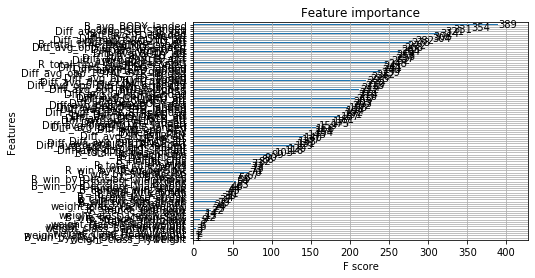

In [0]:
xgb3 = XGBClassifier(learning_rate=0.01,
                     n_estimators=50000,
                     max_depth=8,
                     min_child_weight=4,
                     gamma=0.1,
                     subsample=0.6,
                     colsample_bytree=0.7,
                     objective='binary:logistic',
                     nthread=-1,
                     scale_pos_weight=1,
                     reg_alpha=0.01,
                     reg_lambda=1,
                     seed=1,
                     silent=False)
modelfit(xgb3, new_train, predictors)

#### Evaluation

In [0]:
accuracy_score(new_test.Winner_num, xgb3.predict(new_test.drop('Winner_num', axis=1)))

0.6846011131725418

# Final Models

In [0]:
from sklearn.metrics import roc_auc_score

## L1/Lasso Regularization

In [0]:
lr_l1 = LogisticRegression(penalty='l1', dual=False, tol=0.0001,
                   C=0.4, fit_intercept=True, intercept_scaling=1,
                   class_weight=None, random_state=None, solver='liblinear',
                   max_iter=10000, multi_class='auto', verbose=0,
                   n_jobs=-1)
fit_lr_l1 = lr_l1.fit(train_X, train_y)
fit_lr_l1.score(test_X, test_y)

C:\Users\cspa3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


0.6787204450625869

In [0]:
roc_auc_score(val_y, fit_lr_l1.predict(val_X))

0.5572209005198696

## Random Forest

In [0]:
fit_ensemble_rf = RandomForestClassifier(n_estimators=150, criterion='entropy', min_samples_split=5,
                                         min_samples_leaf=1, max_features='sqrt', n_jobs=-1, ccp_alpha=0).fit(train_X, train_y)
fit_ensemble_rf.score(test_X, test_y)

0.6759388038942976

In [0]:
roc_auc_score(val_y, fit_ensemble_rf.predict(val_X))

0.5371486474579258

## XGBoost


Model Report
Accuracy : 0.8928
AUC Score (Train): 0.986283


0.6856745479833102

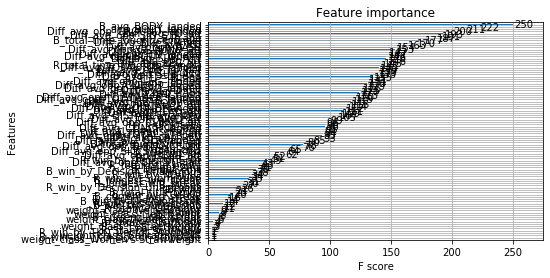

In [0]:

xgb_final = XGBClassifier(learning_rate=0.01,
                          n_estimators=50000,
                          max_depth=8,
                          min_child_weight=4,
                          gamma=0.1,
                          subsample=0.6,
                          colsample_bytree=0.7,
                          objective='binary:logistic',
                          nthread=-1,
                          scale_pos_weight=1,
                          reg_alpha=0.01,
                          reg_lambda=1,
                          seed=1,
                          silent=False)
params = xgb_final.get_xgb_params()
cvresult = xgb.cv(params, xgb_train, num_boost_round=xgb_final.get_params()['n_estimators'], nfold=10,
                  metrics='error', early_stopping_rounds=2000)
modelfit(xgb_final, pd.concat([train_X, train_y], axis=1), predictors)
accuracy_score(test_y, xgb_final.predict(test_X))

In [0]:
(1-cvresult.tail(1)['test-error-mean']).values[0]

0.6766061

In [0]:
roc_auc_score(val_y, xgb_final.predict(val_X))

0.5641201868005992